GCI最終課題の作業場だったファイル
<br>最終課題：<br>
Home Credit社https://www.kaggle.com/c/home-credit-default-risk<br>のデータで機械学習を用いて、ビジネスモデルを提案した発表スライド

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(linewidth=200)
pd.options.display.max_columns=130
pd.options.display.max_rows=100
pd.options.display.max_colwidth=100
from sklearn.preprocessing import LabelEncoder

In [114]:
path='C:\Anaconda3\@csv_file\home\\'
train_df=pd.read_csv(path+'application_train.csv')
test_df=pd.read_csv(path+'application_test.csv')
data_df=pd.concat([train_df,test_df],sort=False,ignore_index=True)

In [115]:
data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [116]:
data_df['YEARS_BIRTH']=data_df['DAYS_BIRTH'].apply(lambda x:abs(x/365))

In [117]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
le = le.fit(data_df['CODE_GENDER'])
#ラベルを整数に変換
data_df['GENDER_label'] = le.transform(data_df['CODE_GENDER'])


In [144]:
data_df['OCCUPATION_TYPE'].fillna(0,inplace=True)
le=LabelEncoder()
le.fit(data_df['OCCUPATION_TYPE'])
data_df['OCCUPATION_label']=le.transform(data_df['OCCUPATION_TYPE'])
data_df['OCCUPATION_TYPE'].apply(lambda x:type(x)).value_counts()
data_df['OCCUPATION_label']

0          9
1          4
2          9
3          9
4          4
          ..
356250     0
356251    15
356252     0
356253    11
356254     4
Name: OCCUPATION_label, Length: 356255, dtype: int32

In [156]:
data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0).astype(int)

0         1
1         0
2         0
3         0
4         0
         ..
356250    1
356251    0
356252    1
356253    2
356254    4
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 356255, dtype: int32

In [166]:
for i in ['GENDER_label','AMT_INCOME_TOTAL','YEARS_BIRTH','AMT_CREDIT','AMT_REQ_CREDIT_BUREAU_YEAR','OCCUPATION_label']:
    print(data_df[i].dtypes)
    print(data_df[i].isnull().sum())

int32
0
float64
0
float64
0
float64
0
float64
47568
int32
0


In [174]:
data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)
data_df['AMT_REQ_CREDIT_BUREAU_YEAR']=data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)
data_df['AMT_REQ_CREDIT_BUREAU_YEAR']

0         1
1         0
2         0
3         0
4         0
         ..
356250    1
356251    0
356252    1
356253    2
356254    4
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 356255, dtype: int32

In [160]:
data_df['AMT_CREDIT'].astype(int)

0          406597
1         1293502
2          135000
3          312682
4          513000
           ...   
356250     412560
356251     622413
356252     315000
356253     450000
356254     312768
Name: AMT_CREDIT, Length: 356255, dtype: int32

In [196]:
from sklearn.preprocessing import StandardScaler
bank_sub=data_df[['GENDER_label','AMT_INCOME_TOTAL','YEARS_BIRTH','AMT_CREDIT','AMT_REQ_CREDIT_BUREAU_YEAR','OCCUPATION_label']]
sc=StandardScaler()
sc.fit(bank_sub)
bank_sub_std=sc.transform(bank_sub)


ValueError: x and y must have same first dimension, but have shapes (9,) and (19,)

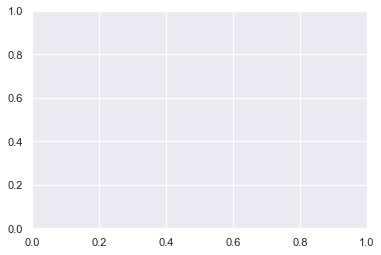

In [176]:
from sklearn.cluster import KMeans
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

Text(0, 0.5, 'Distortion')

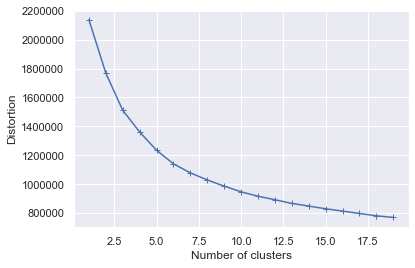

In [177]:
    
# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [178]:
km = KMeans(n_clusters=5,            # クラスターの個数
            init='k-means++',        # セントロイドの初期値をランダムに設定
            #n_init=10,               # 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            #max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数
            #tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態
y_km = km.fit_predict(bank_sub_std)

0    25190
1    69889
2    32772
3    32259
4    32967
5    56394
6    46197
7    60587
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

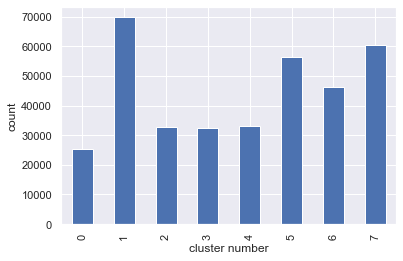

In [204]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=8, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [205]:
bank_result=pd.concat([data_df,labels],axis=1)
bank_result.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,GENDER_label,OCCUPATION_label,cluster_number
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,25.920548,1,9,5
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,45.931507,0,4,4
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [206]:
# 分割のための区切りを設定
bins = [20,25,30,35,40,45,50,55,60]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_result['YEARS_BIRTH'], bins, right=False)

# クラスタ番号と年齢層を結合
df= pd.concat([bank_result['cluster_number'], qcut_age], axis=1)
# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number', 'YEARS_BIRTH']).size().unstack().fillna(0)
cross_cluster_age


YEARS_BIRTH,"[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)"
cluster_number,,,,,,,,
0,376.0,1563.0,3338.0,4617.0,5207.0,4205.0,3043.0,1917.0
1,3010.0,9176.0,11269.0,12725.0,12495.0,10216.0,8377.0,1882.0
2,0.0,0.0,0.0,658.0,3283.0,6821.0,7793.0,6884.0
3,337.0,1902.0,2868.0,4352.0,4876.0,4424.0,4673.0,4043.0
4,188.0,1353.0,2769.0,4832.0,5770.0,6117.0,5520.0,4187.0
5,6005.0,13990.0,14465.0,12206.0,7670.0,1737.0,321.0,0.0
6,4105.0,9847.0,11012.0,10295.0,8745.0,2193.0,0.0,0.0
7,0.0,0.0,0.0,0.0,3.0,5260.0,10697.0,19298.0


In [207]:
hist_age=pd.value_counts(qcut_age)
hist_age

[35, 40)    49685
[40, 45)    48049
[30, 35)    45721
[45, 50)    40973
[50, 55)    40424
[55, 60)    38211
[25, 30)    37831
[20, 25)    14021
Name: YEARS_BIRTH, dtype: int64

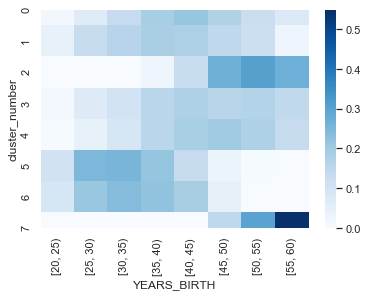

In [208]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

0         (189000.0, 225000.0]
1         (225000.0, 270000.0]
2         (25649.999, 81000.0]
3         (112500.0, 135000.0]
4         (112500.0, 135000.0]
                  ...         
356250    (112500.0, 135000.0]
356251    (153000.0, 166500.0]
356252    (189000.0, 225000.0]
356253    (189000.0, 225000.0]
356254    (112500.0, 135000.0]
Name: AMT_INCOME_TOTAL, Length: 356255, dtype: category
Categories (10, interval[float64]): [(25649.999, 81000.0] < (81000.0, 99000.0] < (99000.0, 112500.0] < (112500.0, 135000.0] ... (166500.0, 189000.0] < (189000.0, 225000.0] < (225000.0, 270000.0] < (270000.0, 117000000.0]]


AMT_INCOME_TOTAL,"(25649.999, 81000.0]","(81000.0, 99000.0]","(99000.0, 112500.0]","(112500.0, 135000.0]","(135000.0, 153000.0]","(153000.0, 166500.0]","(166500.0, 189000.0]","(189000.0, 225000.0]","(225000.0, 270000.0]","(270000.0, 117000000.0]"
cluster_number,,,,,,,,,,
0,111,304,789,1993,377,1817,2899,5488,3492,7920
1,9117,9111,10760,12281,1544,7055,6112,7584,3108,3217
2,3501,3072,3744,5449,723,3232,3719,4900,2103,2329
3,2329,2585,3641,5221,777,3626,3636,5148,2463,2833
4,650,1201,2006,3789,750,3266,3840,6584,3857,7024
5,2322,3754,6120,9825,1185,6703,7337,9917,4305,4926
6,6070,5686,6885,8079,1102,4769,4150,5098,2142,2216
7,13142,8546,8587,9686,1645,5324,4377,5417,1991,1872


(112500.0, 135000.0]       56323
(189000.0, 225000.0]       50136
(99000.0, 112500.0]        42532
(25649.999, 81000.0]       37242
(166500.0, 189000.0]       36070
(153000.0, 166500.0]       35792
(81000.0, 99000.0]         34259
(270000.0, 117000000.0]    32337
(225000.0, 270000.0]       23461
(135000.0, 153000.0]        8103
Name: AMT_INCOME_TOTAL, dtype: int64


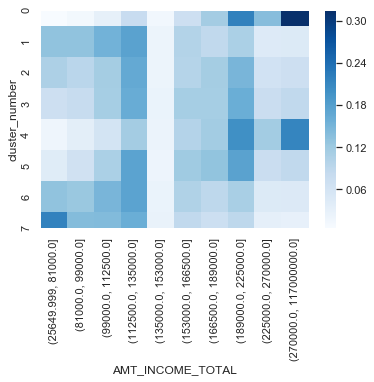

In [209]:
# 分割のための区切りを設定
#bins = [50000,75000,90000,110000,120000,135000,135001,160000,200000,220000,250000,300000,,120000000]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.qcut(bank_result['AMT_INCOME_TOTAL'], 10)

# クラスタ番号と年齢層を結合
df= pd.concat([bank_result['cluster_number'], qcut_age], axis=1)
# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_income = df.groupby(['cluster_number', 'AMT_INCOME_TOTAL']).size().unstack().fillna(0)
print(qcut_age)
display(cross_cluster_income)
print(qcut_age.value_counts())
sns.heatmap(cross_cluster_income.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [210]:
df= pd.concat([bank_result['cluster_number'], data_df['GENDER_label']], axis=1)

In [211]:
cross_cluster_gender = df.groupby(['cluster_number', 'GENDER_label']).size().unstack().fillna(0)
cross_cluster_gender

GENDER_label,0,1,2
cluster_number,,,
0,13.0,25177.0,0.0
1,69889.0,0.0,0.0
2,0.0,32771.0,1.0
3,25473.0,6786.0,0.0
4,32967.0,0.0,0.0
5,0.0,56391.0,3.0
6,46197.0,0.0,0.0
7,60587.0,0.0,0.0


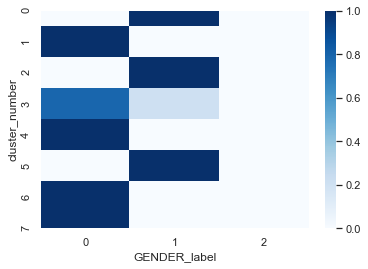

In [212]:
sns.heatmap(cross_cluster_gender.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [218]:
df= pd.concat([bank_result['cluster_number'], data_df['OCCUPATION_label']], axis=1)

In [221]:
cross_cluster_gender = df.groupby(['cluster_number', 'OCCUPATION_label']).size().unstack().fillna(0)
cross_cluster_gender

OCCUPATION_label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
cluster_number,,,,,,,,,,,,,,,,,,,
0,4106.0,91.0,33.0,82.0,1572.0,4186.0,12.0,1231.0,97.0,6982.0,192.0,4540.0,72.0,31.0,14.0,828.0,23.0,1078.0,20.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1188.0,58.0,17585.0,277.0,8277.0,7153.0,2282.0,633.0,27995.0,1232.0,1976.0,1233.0
2,14780.0,71.0,205.0,106.0,1182.0,6361.0,13.0,804.0,25.0,6609.0,338.0,1315.0,32.0,8.0,7.0,89.0,4.0,823.0,0.0
3,11298.0,1095.0,836.0,897.0,2874.0,1450.0,82.0,1262.0,34.0,5694.0,193.0,1845.0,1020.0,274.0,76.0,2619.0,90.0,548.0,72.0
4,9056.0,2609.0,464.0,798.0,4854.0,210.0,161.0,2006.0,45.0,4259.0,26.0,3927.0,1370.0,421.0,106.0,2348.0,125.0,143.0,39.0
5,6263.0,152.0,122.0,443.0,3655.0,8459.0,22.0,2402.0,281.0,21445.0,1339.0,4944.0,155.0,90.0,53.0,3295.0,44.0,3068.0,162.0
6,16853.0,5521.0,1658.0,3082.0,14284.0,555.0,309.0,3293.0,50.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,49640.0,1902.0,1991.0,1432.0,3510.0,155.0,68.0,1048.0,17.0,675.0,0.0,97.0,51.0,1.0,0.0,0.0,0.0,0.0,0.0


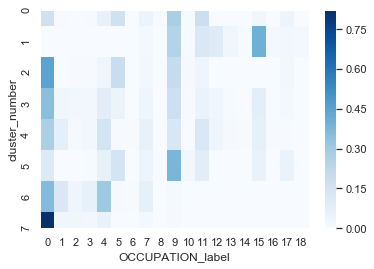

In [222]:
sns.heatmap(cross_cluster_gender.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [223]:
df= pd.concat([bank_result['cluster_number'], data_df['AMT_REQ_CREDIT_BUREAU_YEAR']], axis=1)

In [225]:
cross_cluster_gender = df.groupby(['cluster_number', 'AMT_REQ_CREDIT_BUREAU_YEAR']).size().unstack().fillna(0)
cross_cluster_gender

AMT_REQ_CREDIT_BUREAU_YEAR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25
cluster_number,,,,,,,,,,,,,,,,,,,,,,,,,
0,9901.0,5859.0,4319.0,2705.0,1583.0,645.0,144.0,29.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28160.0,15925.0,13075.0,8838.0,3460.0,431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13745.0,6770.0,5691.0,3817.0,2428.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,39.0,5589.0,10698.0,7747.0,4372.0,2415.0,1216.0,43.0,43.0,35.0,21.0,11.0,6.0,3.0,8.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
4,12369.0,7747.0,6039.0,4113.0,1979.0,571.0,122.0,21.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,21863.0,12527.0,9954.0,6643.0,3949.0,1377.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,20851.0,10791.0,8112.0,5069.0,1370.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,23319.0,12997.0,11491.0,8598.0,4101.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


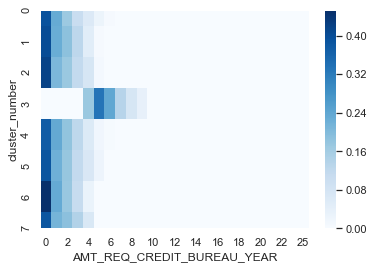

In [226]:
sns.heatmap(cross_cluster_gender.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

AMT_CREDIT,"(44999.999, 180000.0]","(180000.0, 252000.0]","(252000.0, 299250.0]","(299250.0, 408865.5]","(408865.5, 500211.0]","(500211.0, 585000.0]","(585000.0, 725328.0]","(725328.0, 900000.0]","(900000.0, 1125000.0]","(1125000.0, 4050000.0]"
cluster_number,,,,,,,,,,
0,1.0,0.0,0.0,0.0,10.0,10.0,193.0,4440.0,8644.0,11892.0
1,8886.0,7022.0,7679.0,8453.0,8182.0,8306.0,8303.0,9180.0,3600.0,278.0
2,3498.0,3243.0,4113.0,3836.0,3997.0,4284.0,4349.0,4373.0,1008.0,71.0
3,3345.0,3131.0,3258.0,3804.0,3621.0,3740.0,3670.0,4084.0,2407.0,1199.0
4,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1954.0,10187.0,20815.0


(725328.0, 900000.0]      42314
(44999.999, 180000.0]     39482
(408865.5, 500211.0]      35707
(299250.0, 408865.5]      35634
(585000.0, 725328.0]      35603
(500211.0, 585000.0]      35561
(252000.0, 299250.0]      35536
(1125000.0, 4050000.0]    34331
(180000.0, 252000.0]      31867
(900000.0, 1125000.0]     30220
Name: AMT_CREDIT, dtype: int64


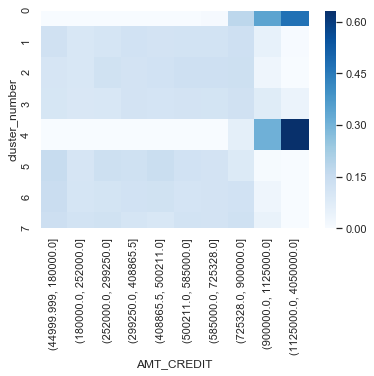

In [275]:
qcut_age = pd.qcut(bank_result['AMT_CREDIT'], 10)

# クラスタ番号と年齢層を結合
df= pd.concat([bank_result['cluster_number'], qcut_age], axis=1)
# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_income = df.groupby(['cluster_number', 'AMT_CREDIT']).size().unstack().fillna(0)
display(cross_cluster_income.head())
print(qcut_age.value_counts())
sns.heatmap(cross_cluster_income.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')#data_df['AMT_CREDIT'].qcut(5)

In [274]:
bank_result[['OCCUPATION_label','OCCUPATION_TYPE']].head()

,OCCUPATION_label,OCCUPATION_TYPE
0,9,Laborers
1,4,Core staff
2,9,Laborers
3,9,Laborers
4,4,Core staff


In [252]:
bank_result[bank_result['OCCUPATION_label']==18]['OCCUPATION_TYPE']

89        Waiters/barmen staff
178       Waiters/barmen staff
797       Waiters/barmen staff
1029      Waiters/barmen staff
1061      Waiters/barmen staff
                  ...         
355173    Waiters/barmen staff
355272    Waiters/barmen staff
355779    Waiters/barmen staff
355908    Waiters/barmen staff
355977    Waiters/barmen staff
Name: OCCUPATION_TYPE, Length: 1526, dtype: object

In [280]:
bank_result[bank_result['cluster_number']==1]['CNT_FAM_MEMBERS'].value_counts()

2.0     33553
3.0     14744
1.0     13659
4.0      6865
5.0       942
6.0        94
7.0        24
8.0         3
10.0        2
16.0        1
13.0        1
20.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [288]:
bank_result[bank_result['cluster_number']==1].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,GENDER_label,OCCUPATION_label,cluster_number
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,52.068493,0,9,1
12,100016,0.0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,-311.0,-3227,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Business Entity Type 2,0.464831,0.715042,0.176653,0.0825,NaN,0.9811,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0135,NaN,0.0778,NaN,0.0000,0.0840,NaN,0.9811,NaN,NaN,0.0000,0.2069,0.1667,NaN,0.0138,NaN,0.0810,NaN,0.000,0.0833,NaN,0.9811,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0137,NaN,0.0792,NaN,0.0000,reg oper account,block of flats,0.0612,NaN,No,0.0,0.0,0.0,0.0,-2370.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0,36.819178,0,9,1
14,100018,0.0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,NaN,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.721940,0.642656,NaN,0.3495,0.1335,0.9985,0.9796,0.1143,0.4,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001,0.3561,0.1386,0.9985,0.9804,0.1153,0.4028,0.1724,0.6667,0.7083,0.1798,0.3113,0.3932,0.0195,0.106,0.3529,0.1335,0.9985,0.9799,0.1150,0.

In [291]:
bank_result[bank_result['cluster_number']==1]['NAME_FAMILY_STATUS'].value_counts()

Married                 42185
Single / not married    10851
Civil marriage           8911
Separated                5517
Widow                    2425
Name: NAME_FAMILY_STATUS, dtype: int64

In [295]:
bank_result[bank_result['NAME_FAMILY_STATUS']=='Separated']['cluster_number'].value_counts()

1    5517
7    5270
6    3014
3    2296
5    2126
4    2054
2    1615
0     833
Name: cluster_number, dtype: int64

In [304]:
for i in range(0,8):
    ans=bank_result[(bank_result['cluster_number']==i)&(bank_result['TARGET']==1)].shape[0]/ bank_result[bank_result['cluster_number']==i].shape[0]
    print(round(ans*100,3))

6.411
7.496
7.76
7.331
4.662
10.285
6.946
4.154
